# Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline


# Loading Data

In [3]:
data = pd.read_csv(r"C:\Users\Mahaveer\Downloads\logistic.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info

<bound method DataFrame.info of     DMV_Test_1  DMV_Test_2  Results
0    34.623660   78.024693        0
1    30.286711   43.894998        0
2    35.847409   72.902198        0
3    60.182599   86.308552        1
4    79.032736   75.344376        1
..         ...         ...      ...
95   83.489163   48.380286        1
96   42.261701   87.103851        1
97   99.315009   68.775409        1
98   55.340018   64.931938        1
99   74.775893   89.529813        1

[100 rows x 3 columns]>

In [5]:
data.describe()

,DMV_Test_1,DMV_Test_2,Results
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
scores= data[['DMV_Test_1','DMV_Test_2']].values
results= data['Results'].values  

In [7]:
passed = (results==1).reshape(100,1)
failed = (results==0).reshape(100,1)



# Data Visualization 

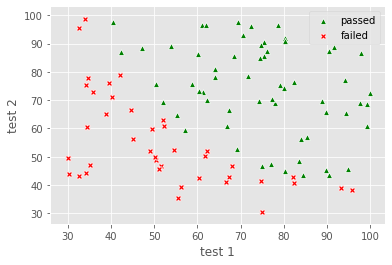

In [8]:
ax=sns.scatterplot(x=scores[passed[:,0],0],
                  y=scores[passed[:,0],1],
                  marker="^",color='green' )
ax=sns.scatterplot(x=scores[failed[:,0],0],
                  y=scores[failed[:,0],1],
                  marker="X",color='red' )
ax.set(xlabel='test 1', ylabel='test 2')
ax.legend(['passed','failed'])
plt.show()

# Logistic Sigmoid Function

In [9]:
def log_fun (x):
   return 1/(1+np.exp(-x))

In [10]:
log_fun(0)

0.5

# COMPUTE COST FUNCTION

In [52]:
def cost_fun (theta, x, y):
      m = len(y)
      y_predict = log_fun(np.dot(x,theta))
      error = (y*np.log(y_predict))+ (1-y)*np.log(1-y_predict)
      cost= -1/m * sum(error)
      gradient= 1/m * np.dot(x.transpose(), (y_predict - y))
      return cost[0], gradient

# Feature scaling

In [53]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores , axis = 0)
scores= (scores-mean_scores)/std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X= np.append(np.ones((rows,1)), scores, axis = 1)
y= results.reshape(rows,1)

theta_init=np.zeros((cols+1,1))
cost, gradient = cost_fun(theta_init,X,y)

print('Cost at initilization', cost)
print('gradient at initilization',gradient)

Cost at initilization 0.693147180559946
gradient at initilization [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


# GRADIENT DESCENT

In [69]:
def gradient_descent(x,y,theta,alpha,iterations):
    costs=[]
    for i in range(iterations):
        cost,gradient= cost_fun(theta,x,y)
        theta-=(alpha*gradient)
        costs.append(cost)
    return theta, costs
    

In [70]:
theta,cost = gradient_descent(X,y,theta_init,1,200)

print ( 'theta after running gradient descent::',theta)
print('resulting cost', cost[-1])

theta after running gradient descent:: [[1.71672355]
 [3.98910227]
 [3.72157033]]
resulting cost 0.20349778741207902


# Plotting Decision Boundary

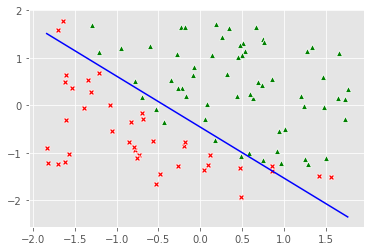

In [75]:
ax= sns.scatterplot(x=X[passed[:,0],1],
                   y= X[passed[:,0],2],
                   marker = "^",
                   color = "green")
ax= sns.scatterplot(x=X[failed[:,0],1],
                   y= X[failed[:,0],2],
                   marker = "X",
                   color = "red")
x_boundary = np.array([np.min(X[:,1]),np.max(X[:,1])])
y_boundary = - (theta[0] + theta[1] * x_boundary)/theta[2]
sns.lineplot(x= x_boundary, y= y_boundary, color= 'blue')

# prediction using optimized theta values

In [76]:
def predict(theta,x):
    results= x.dot(theta)
    return results>0

In [77]:
p= predict(theta,X)
print("training accuracy:",sum(p==y)[0],"%")

training accuracy: 89 %
